In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df =pd.read_csv('Aviation_Data.csv', low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(90348, 31)

In [5]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Find missing values in a DataFrame

Data Cleaning & Missing Value Imputation

In [7]:
# check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing)

Missing values:
 Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2841
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type     

In [8]:
# Drop irrelevant or consistently missing columns (example)
df.drop(columns=['investigation_type', 'publication_date'], inplace=True, errors='ignore')

Clean Column Names

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace('.', '_').str.replace(' ', '_')
df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [10]:
df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [11]:
df['event_date']

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
90343    2022-12-26
90344    2022-12-26
90345    2022-12-26
90346    2022-12-26
90347    2022-12-29
Name: event_date, Length: 90348, dtype: object

In [12]:
# Convert dates
df['event_date'] = pd.to_datetime(df['event_date'], errors='coerce')
df = df[df['event_date'].notnull()] 
# remove rows with invalid dates

In [ ]:
# Fill missing values
df['aircraft_damage'].fillna('Unknown', inplace=True)
df['engine_type'].fillna('Unknown', inplace=True)
df['make'].fillna('Unknown', inplace=True)

In [2]:
# Create a risk score: fatalities + serious injuries weighted more
df['risk_score'] = (
    df['total_fatal_injuries'].fillna(0)*3 +
    df['total_serious_injuries'].fillna(0)*2 +
    df['total_minor_injuries'].fillna(0)*1
)

NameError: name 'df' is not defined

In [15]:
# Group by aircraft make and calculate average risk score and total incidents
risk_summary = df.groupby('make').agg({
    'risk_score': 'mean',
    'event_id': 'count'
}).rename(columns={'event_id': 'total_incidents'}).sort_values(by='risk_score')


In [19]:
# Display the 10 makes with the lowest average risk score
print(risk_summary.head(10))

                    risk_score  total_incidents
make                                           
Cano                       0.0                1
PHILLIP B ROLLS            0.0                1
DOUGLAS BRIAN G            0.0                1
DOUGLAS K THOMPSON         0.0                1
DOVA AIRCRAFT              0.0                1
James A Gray               0.0                1
PHELPS                     0.0                1
James A Nelson             0.0                1
PFOUTS ALFRED L            0.0                1
DOUBLEDAY DONALD           0.0                1


In [17]:
# Make a safe copy of your DataFrame (important if df was filtered from another one)
df = df.copy()

# Fill missing values
df['aircraft_damage'].fillna('Unknown', inplace=True)
df['engine_type'].fillna('Unknown', inplace=True)
df['make'].fillna('Unknown', inplace=True)

# Create a risk score: fatalities + serious injuries weighted more
df['risk_score'] = (
    df['total_fatal_injuries'].fillna(0)*3 +
    df['total_serious_injuries'].fillna(0)*2 +
    df['total_minor_injuries'].fillna(0)*1
)

In [18]:
# Group by aircraft make and calculate average risk score and total incidents
risk_summary = df.groupby('make').agg({
    'risk_score': 'mean',
    'event_id': 'count'
}).rename(columns={'event_id': 'total_incidents'}).sort_values(by='risk_score')

# Display the 10 makes with the lowest average risk score
print(risk_summary.head(10))

                    risk_score  total_incidents
make                                           
Cano                       0.0                1
PHILLIP B ROLLS            0.0                1
DOUGLAS BRIAN G            0.0                1
DOUGLAS K THOMPSON         0.0                1
DOVA AIRCRAFT              0.0                1
James A Gray               0.0                1
PHELPS                     0.0                1
James A Nelson             0.0                1
PFOUTS ALFRED L            0.0                1
DOUBLEDAY DONALD           0.0                1


In [ ]:
# Establish the carriers with the lowest number of incidences
# What are the possible causes of accidents
#Which routes have most accident occurences
#Which carriers have the highest 

In [9]:
# Establish the number of accidents per model of aircraft
# Establish the model of Aircraft with the lowest accidents


In [10]:
print(df['Investigation.Type'].unique())

['Accident' 'Incident' '25-09-2020' '14-06-2021' '03-11-2020' '24-02-2021'
 '02-02-2021' '05-05-2021' '03-12-2020' '07-12-2020' '06-05-2021'
 '19-11-2020' '04-08-2021' '13-09-2021' '10-06-2021' '14-12-2021'
 '08-06-2021' '24-06-2021' '24-08-2021' '31-03-2021' '27-05-2021'
 '20-05-2021' '18-11-2020' '25-05-2021' '01-06-2021' '15-07-2021'
 '15-10-2021' '26-09-2020' '03-06-2021' '29-09-2021' '28-01-2021'
 '20-10-2021' '11-12-2020' '11-02-2021' '13-12-2021' '06-01-2021'
 '31-08-2021' '04-03-2021' '05-04-2021' '26-01-2021' '29-01-2021'
 '26-08-2021' '08-11-2021' '20-08-2021' '05-01-2021' '22-09-2021'
 '20-09-2021' '16-07-2021' '19-10-2021' '16-11-2021' '17-12-2021'
 '14-06-2022' '22-06-2022' '13-10-2022' '03-11-2022' '13-07-2022'
 '05-07-2022' '01-09-2022' '12-08-2022' '08-09-2022' '22-09-2022'
 '01-11-2022' '01-07-2022' '20-07-2022' '06-10-2022' '23-09-2022'
 '02-12-2022' '05-08-2022' '08-12-2022' '15-12-2022' '20-12-2022']


In [11]:
df['Investigation.Type'].value_counts()

Investigation.Type
Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
13-09-2021        1
04-08-2021        1
05-08-2022        1
03-11-2020        1
06-01-2021        1
Name: count, Length: 71, dtype: int64

In [12]:
# Step 4: Filter only accidents (exclude incidents)
accidents_df = df[df['Investigation.Type'] == 'Accident']
accidents_df 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
# number of accident records
num_accidents = accidents_df.shape[0]
num_accidents

85015

In [18]:
# Count accidents per combination of Make and Model
accidents_by_make_model = accidents_df.groupby(['Make', 'Model']).size().reset_index(name='Accident Count')
accidents_by_make_model


,Make,Model,Accident Count
0,107.5 Flying Corporation,One Design DR 107,1
1,1200,G103,1
2,177MF LLC,PITTS MODEL 12,1
3,1977 Colfer-chan,STEEN SKYBOLT,1
4,1st Ftr Gp,FOCKE-WULF 190,1
...,...,...,...
19335,de Havilland,DHC-3,1
19336,de Havilland,DHC-6-200,1
19337,de Havilland,DHC-8-202,1
19338,drone,Viper Pro,1


In [19]:
# Sort by number of accidents in descending order
accidents_by_make_model_sorted = accidents_by_make_model.sort_values(by='Accident Count', ascending=False)
accidents_by_make_model_sorted

,Make,Model,Accident Count
5304,Cessna,152,2155
5326,Cessna,172,1250
5370,Cessna,172N,993
14368,Piper,PA-28-140,809
5279,Cessna,150,711
...,...,...,...
7960,Evans Aircraft,WITTMAN TAILWIND W10,1
7961,Evanson,LONG EZ/52,1
7962,Evarts Aviation Inc.,KITFOX IV 1200,1
7963,Evektor,sportstar,1


In [25]:
# Display the top 10 combinations
accidents_by_make_model_sorted.head(10)

,Make,Model,Accident Count
5304,Cessna,152,2155
5326,Cessna,172,1250
5370,Cessna,172N,993
14368,Piper,PA-28-140,809
5279,Cessna,150,711
5368,Cessna,172M,663
5373,Cessna,172P,594
14262,Piper,PA-18,539
5303,Cessna,150M,537
14378,Piper,PA-28-180,498


In [26]:
accidents_by_make_model_sorted.tail(10)

,Make,Model,Accident Count
7953,Europa Aviation Inc,EUROPA XS TRI-GEAR,1
7954,Europro CZ,Eurofox,1
7955,Evans Aircraft,MAXAIR MU503,1
7956,Evans Aircraft,VARIEZE,1
7959,Evans Aircraft,VP2,1
7960,Evans Aircraft,WITTMAN TAILWIND W10,1
7961,Evanson,LONG EZ/52,1
7962,Evarts Aviation Inc.,KITFOX IV 1200,1
7963,Evektor,sportstar,1
19339,unknown,kit,1


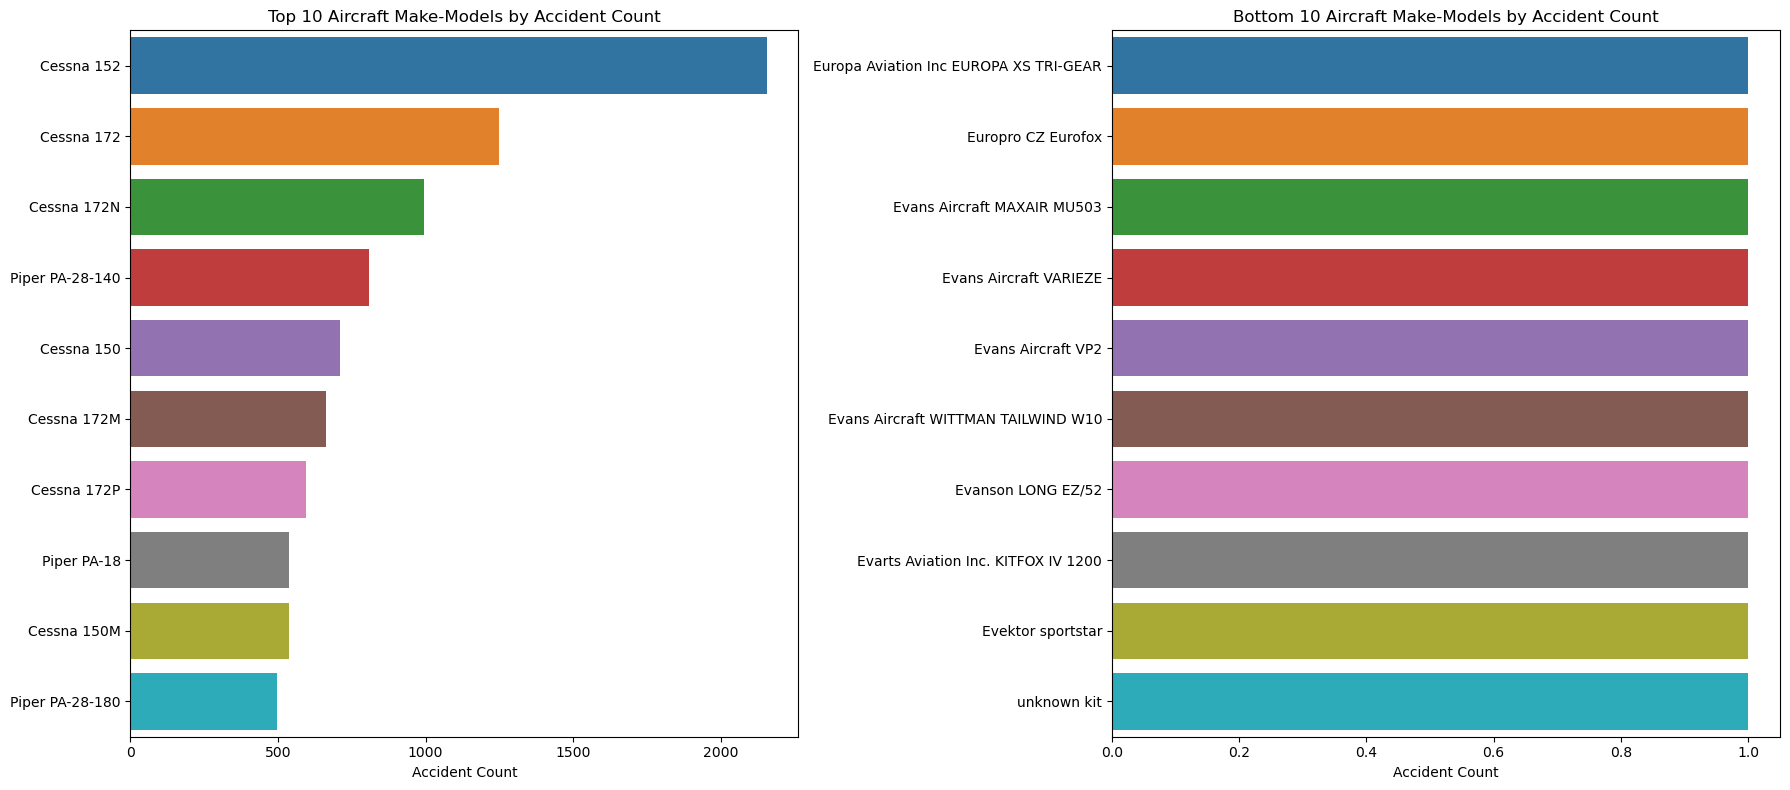

In [33]:
# Prepare data safely
top10 = accidents_by_make_model_sorted.head(10).copy()
bottom10 = accidents_by_make_model_sorted[accidents_by_make_model_sorted['Accident Count'] > 0].tail(10).copy()

# Create aircraft label
top10['Aircraft'] = top10['Make'] + " " + top10['Model']
bottom10['Aircraft'] = bottom10['Make'] + " " + bottom10['Model']

# Set up subplots
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))

# Top 10 plot
sns.barplot(data=top10, x='Accident Count', y='Aircraft', ax=axes[0])
axes[0].set_title("Top 10 Aircraft Make-Models by Accident Count")
axes[0].set_xlabel("Accident Count")
axes[0].set_ylabel("")

# Bottom 10 plot
sns.barplot(data=bottom10, x='Accident Count', y='Aircraft', ax=axes[1])
axes[1].set_title("Bottom 10 Aircraft Make-Models by Accident Count")
axes[1].set_xlabel("Accident Count")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [ ]:
# We recommend the management to invest in aircrafts with the lowest accidents

In [ ]:
#Establish main causes of accidents

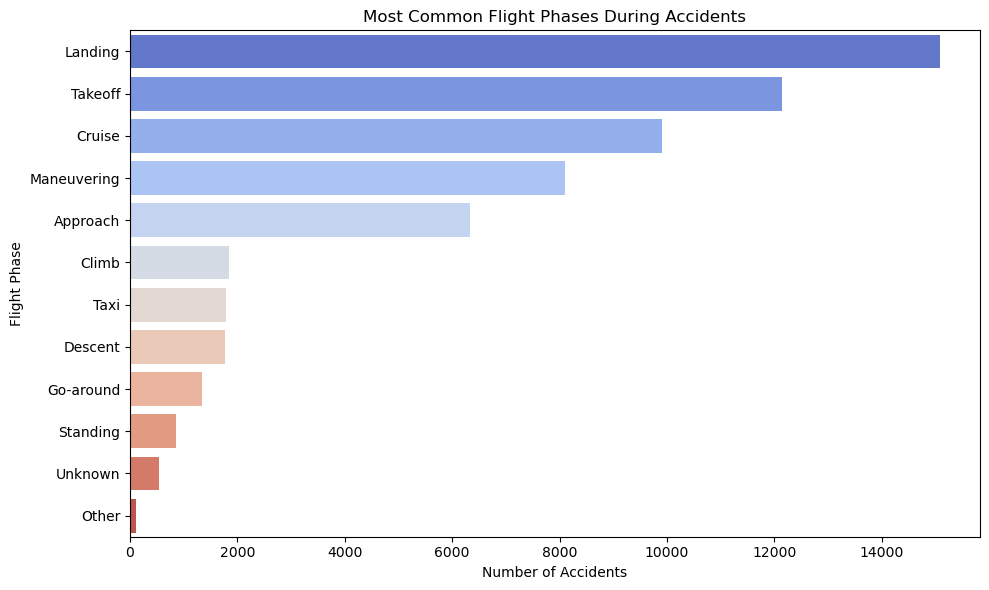

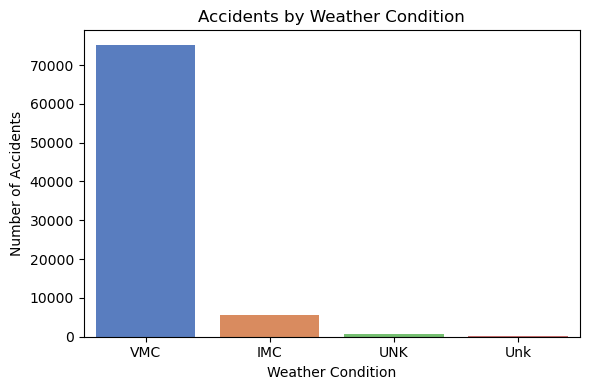

In [36]:
# Filter only Accident cases
accidents_df = df[df["Investigation.Type"] == "Accident"]

# Drop missing values for meaningful counts
phase_counts = accidents_df["Broad.phase.of.flight"].dropna().value_counts()
weather_counts = accidents_df["Weather.Condition"].dropna().value_counts()

# Plot 1: Broad phase of flight
plt.figure(figsize=(10,6))
sns.barplot(x=phase_counts.values, y=phase_counts.index, palette="coolwarm")
plt.title("Most Common Flight Phases During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Flight Phase")
plt.tight_layout()
plt.show()

# Plot 2: Weather conditions
plt.figure(figsize=(6,4))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette="muted")
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

In [37]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [ ]:
Aviation_df.to_csv("Cleaned_Aviation_Data.csv", index=False)